In [82]:
# Question 2: Classification Implementation

# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
# To import the dataset using pandas

# Read the csv as a dataframe
df_train = pd.read_csv("train_1_5.csv", header=None)

# Display the dataframe
# Columns are: x1, x2, y
# x1: intensity; x2: symmetry; y: class label
# print(df_train.head())

print(len)
print(df_train.iloc[0, :2])
x = df_train.iloc[0, :2].values
y = 1.0
print(np.dot(y, x))
print(np.zeros(2))  # [0. 0.]

<built-in function len>
0   -0.725767
1    0.022763
Name: 0, dtype: float64
[-0.72576667  0.02276306]
[0. 0.]
0


In [74]:
# Part (a): Implemention of perception algorithm
# Perceptron Update Rule: 
    # 1. Initialize theta and offset to 0
    # 2. For each example in the training set: 
    #   - If the correct class label, continue
    #   - else, theta = theta + y*x, offset = offset + y
    # 3. Terminate if the training error is zero or a pre-determined number of epochs have been reached
def perception_update(df, theta, offset):
    for i in range(len(df)):
        x = df.iloc[i, :2]
        y = df.iloc[i, 2]
        if ((np.dot(y, x) + offset) <= 0).any():
            theta = theta + np.dot(y, x)
            offset = offset + y
        else:
            continue
    return theta, offset

def perception(df, epochs):
    theta = np.zeros(2)
    offset = 0
    for i in range(epochs):
        theta, offset = perception_update(df, theta, offset)
    return theta, offset

In [77]:
# (a): Run the perceptron algorithm with offset on the training data for 1 epoch (i.e. traversing the training set 1 time), report the theta, offset and accuracy on the test set.
theta, offset = perception(df_train, 1)
print("Theta: ", theta)
print("Offset: ", offset)

# (b): Run the perceptron algorithm with offset on the training data for 5 epochs (i.e. traversing the training set 5 times), report the theta, offset and accuracy on the test set.
theta, offset = perception(df_train, 5)
print("Theta after 5 epochs: ", theta)
print("Offset after 5 epochs: ", offset)

Theta:  [-0.72576667  0.02276306]
Offset:  1.0
Theta after 5 epochs:  [-0.72576667  0.02276306]
Offset after 5 epochs:  1.0


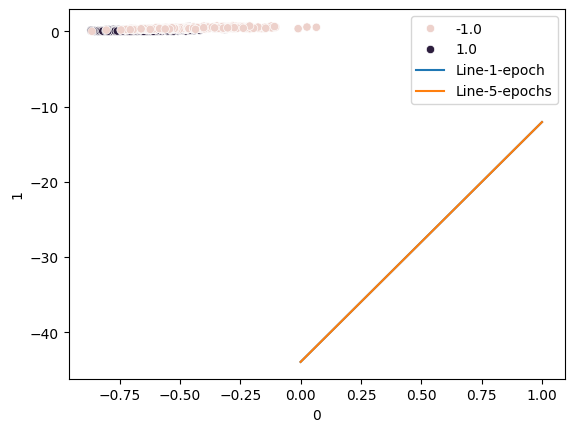

In [83]:
# (c): Plot the test data on a 2-D scatter plot, clearly label the positive examples and negative examples. Then, overlay the 2 decision boundaries (i.e. the lines) you obtained from (a) and (b) on the same scatter plot. Label the first line as "Line-1-epoch" and the second line as "Line-5-epochs" also in the legend.
df_test = pd.read_csv("test_1_5.csv", header=None)

# Plotting the test data
sns.scatterplot(x=df_test.iloc[:, 0], y=df_test.iloc[:, 1], hue=df_test.iloc[:, 2])
# Plotting the decision boundaries
# Line 1 epoch
x = np.linspace(0, 1, 100)
y = (-offset - theta[0]*x)/theta[1]
sns.lineplot(x=x, y=y, label="Line-1-epoch")
# Line 5 epochs
theta, offset = perception(df_train, 5)
y = (-offset - theta[0]*x)/theta[1]
sns.lineplot(x=x, y=y, label="Line-5-epochs")
# Display the plot
plt.show()
